<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [20]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [ ]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [11]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',parse_dates=[0])
print(apple.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB
None


### Step 6.  Set the date as the index

In [12]:
apple.index=apple['Date']
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 7.  Is there any duplicate dates?

In [36]:
apple.index.is_unique #Yes

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple=apple.sort_index()
print(apple)

                 Date   Open   High    Low  Close     Volume  Adj Close
Date                                                                   
1980-12-12 1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15 1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16 1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17 1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18 1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
...               ...    ...    ...    ...    ...        ...        ...
2014-07-01 2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
2014-07-02 2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-03 2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-07 2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-08 2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35

[8465 rows x 7 columns]


### Step 9. Get the last business day of each month

In [17]:
print(pd.date_range('1980-12-12','2014-07-08',freq='M'))

DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='M')


### Step 10.  What is the difference in days between the first day and the oldest

In [31]:
(apple['Date'].max()-apple['Date'].min()).days

12261

### Step 11.  How many months in the data we have?

In [37]:
apple['year'] = apple.index.year
apple['month'] = apple.index.month
apple.groupby(['year','month']).count().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <a list of 10 Patch objects>)

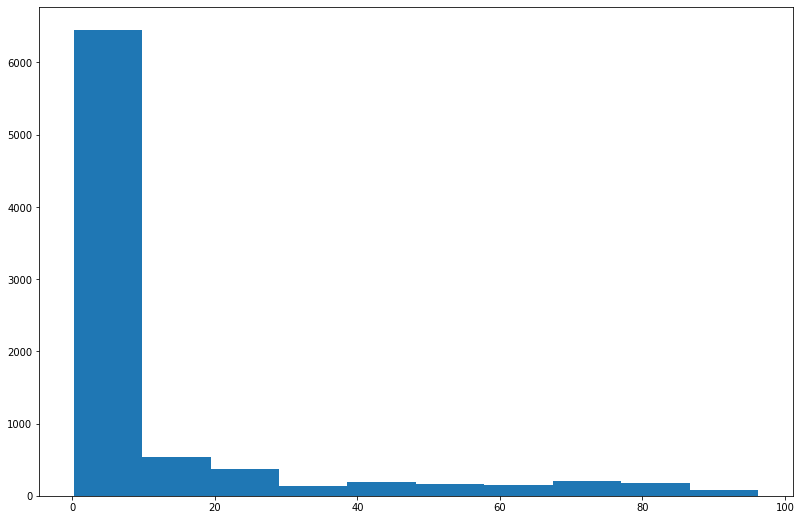

In [33]:
plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])

### BONUS: Create your own question and answer it.